# Determining Optimal Pricing for Retail Products | By Mavani Krishnkumar

## Import Necessary Libraries

In [290]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import shap
from sklearn.inspection import permutation_importance

import joblib

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

### Loads the dataset from a CSV file named "retail_price.csv" into a pandas DataFrame named df

In [291]:
old_df = pd.read_csv("retail_price.csv")

### dataset copy from old_df to df

In [292]:
df = old_df.copy()

## Data Exploration

### Dataset in Count rows and columns

In [293]:
df.shape

(676, 30)

### Dataset in find column name

In [294]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

### Displays the first 5 rows of the DataFrame to get an overview of the dataset.

In [295]:
df.head()

product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.9  3.9  15.011897  215.000000  4.4   
1                   2  ...    89.9  3.9  14.769216  209.000000  4.4   
2                   2  ...    89.9  3.9  13.993833  205.000000  4.4   
3                   2  ...    89.9  3.9  14.656757  199.509804  4.4   
4                   2  ...    89.9  3.9  18.776522  163.398710  4.4   

         fp2  comp_3  ps3        fp3  lag_price  
0   8.760000   45.95  4.0  15.100000      45.90  
1  21.322000   45.95  4.0  12.933333      45.95  
2  22.195932   45.95  4.0  14.840000      45.95  
3  19.412885   45.95  4.0  14.287500      45.95  
4  24.324687   45.95  4.0  15.100000      45.95  

[5 rows x 30 columns]

### Provides a summary of the dataset, including column names, data types, and the number of non-null values in each column.

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

## Data Preprocessing (Data Preparation)

### Identify missing values column & resolve missing values column

#### Checks for missing values in each column and returns their count.

In [297]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

#### Checks for missing values in each column using heatmap.

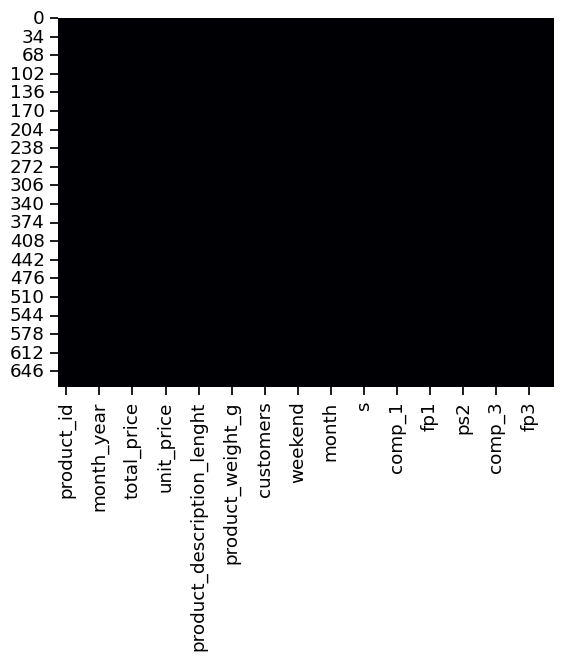

In [298]:
sns.heatmap(df.isnull(), cmap="magma", cbar=False)
plt.show()

### Identifies duplicate rows in the dataset and returns their count.

In [299]:
df.duplicated().sum()

0

### Identifying Outliers

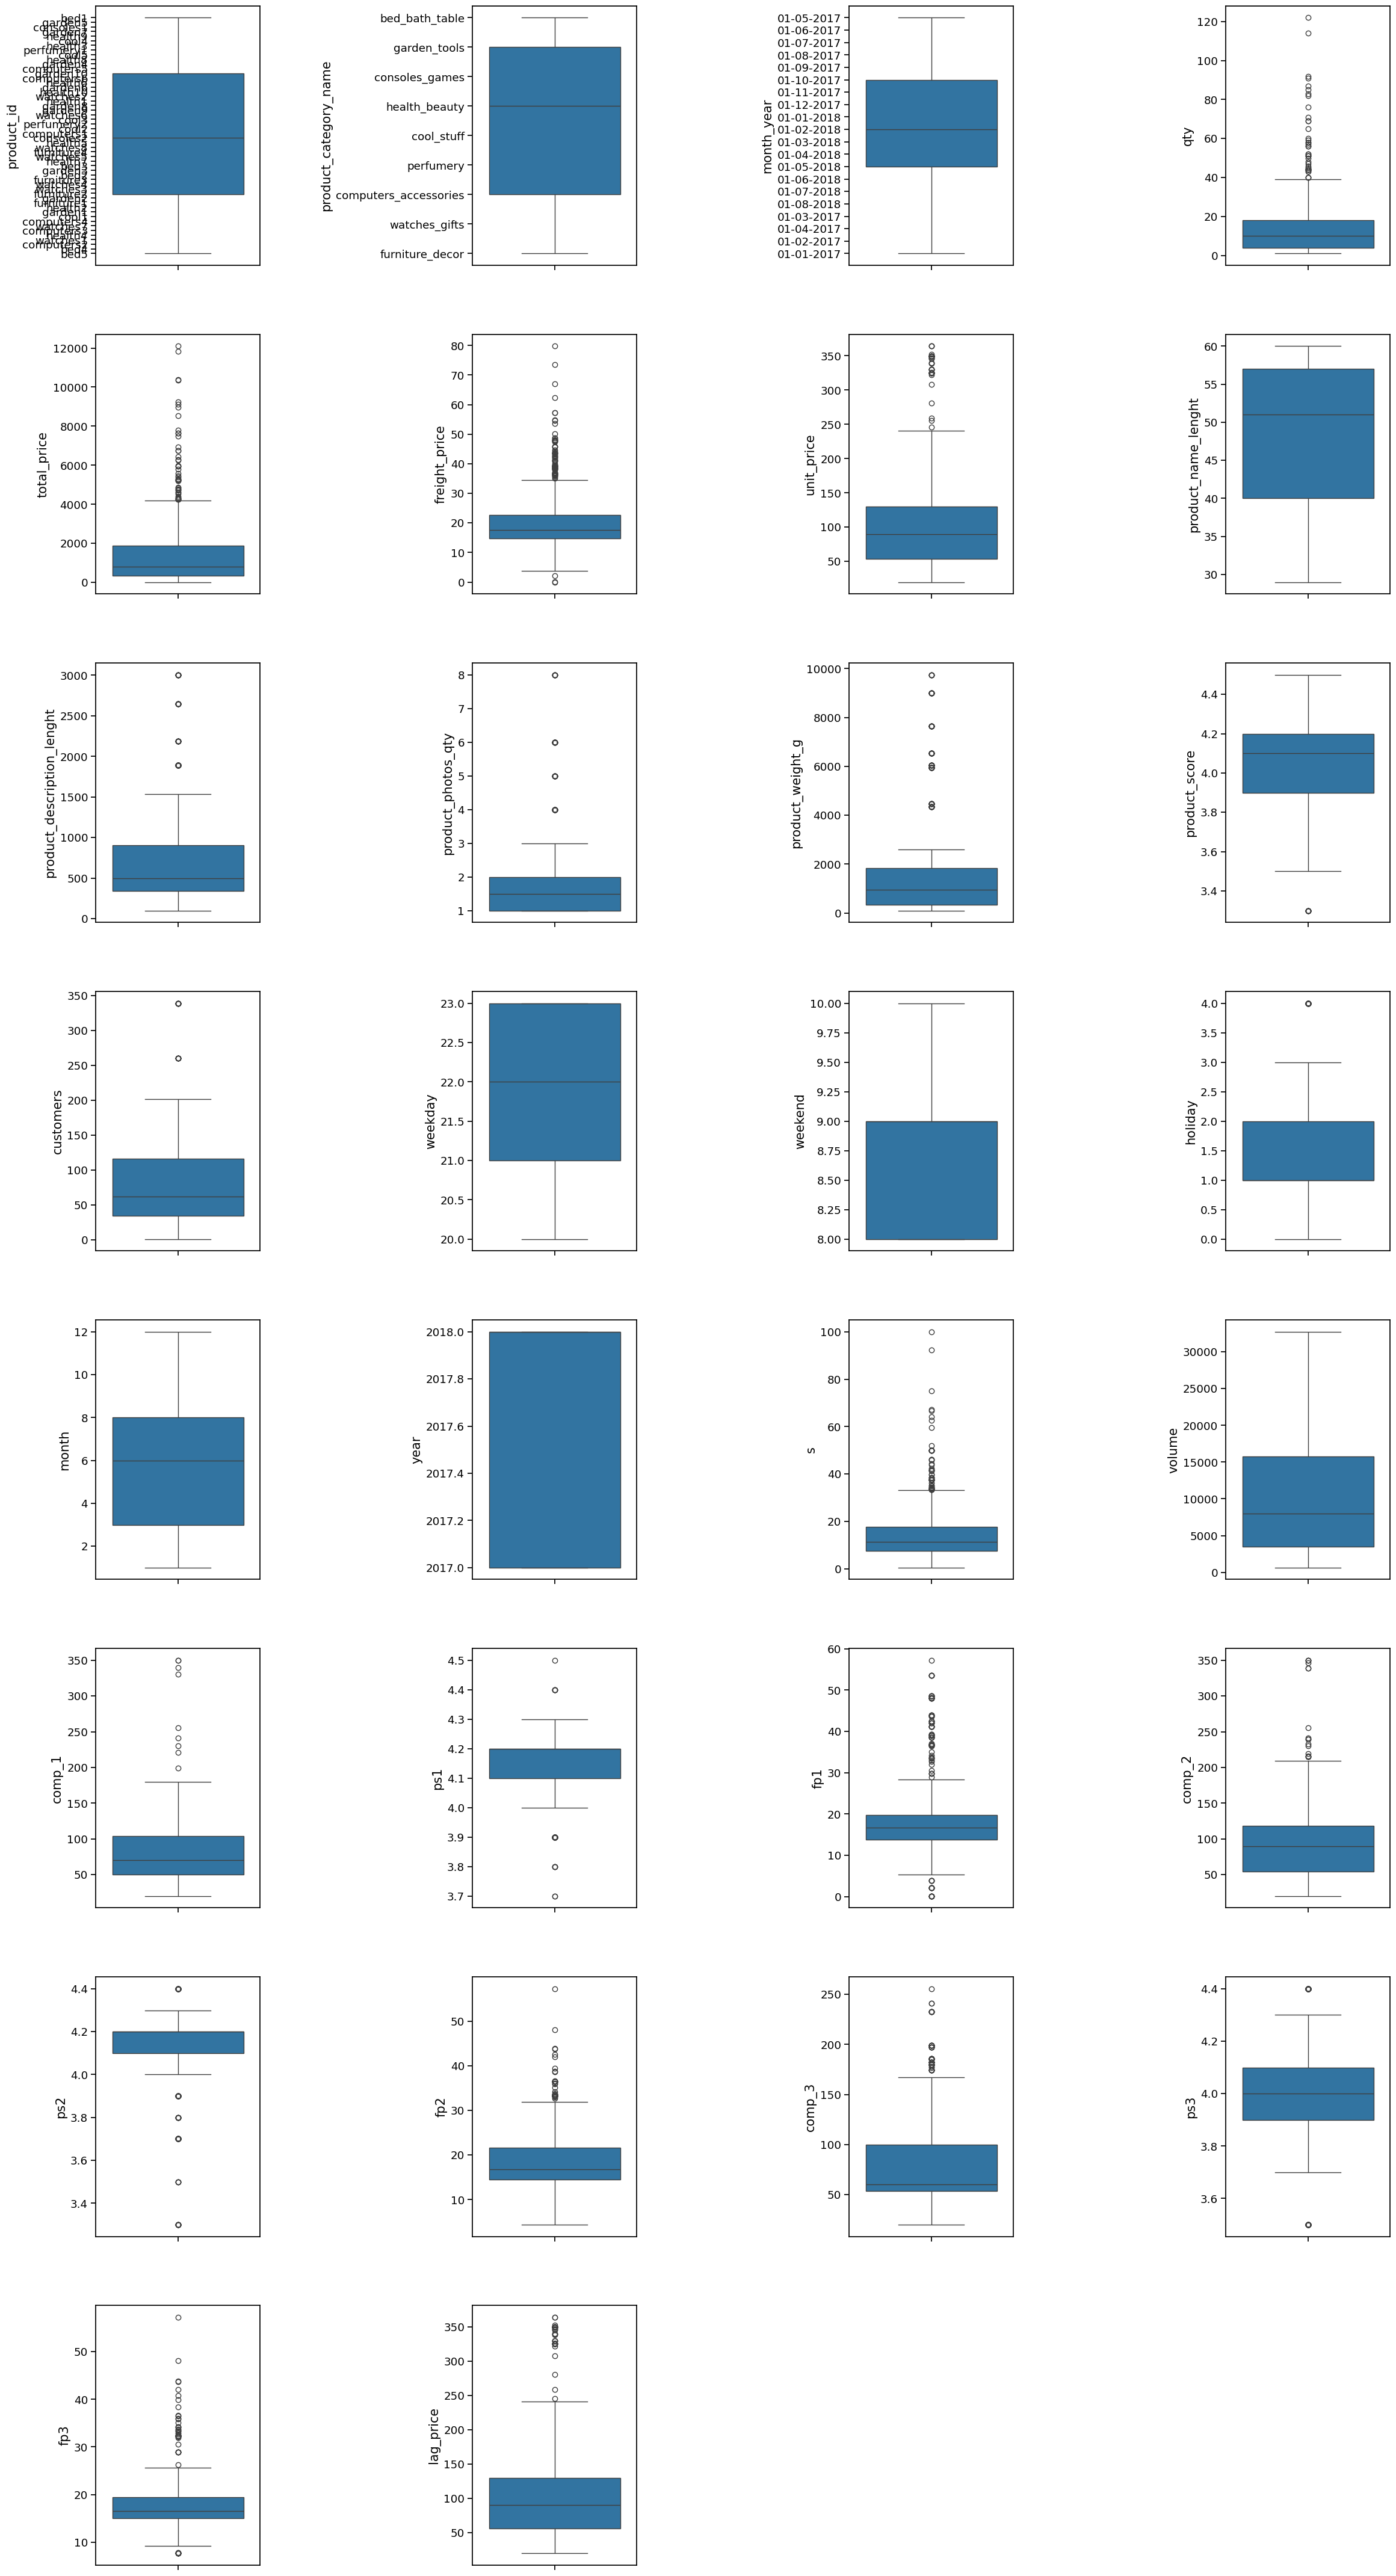

In [300]:
fig = plt.figure(figsize=(25, 50))
for i in range(len(df.columns)):
    ax = fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=df.iloc[:, i], ax=ax)
    ax.set_ylabel(df.columns[i], fontsize=15)
    
plt.tight_layout(pad=5.0)

### Identify unique columns

#### In Dataset how many columns data unique numerical way

In [301]:
for col in df.columns:
    print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

product_id: 52
product_category_name: 9
month_year: 20
qty: 66
total_price: 573
freight_price: 653
unit_price: 280
product_name_lenght: 24
product_description_lenght: 46
product_photos_qty: 7
product_weight_g: 45
product_score: 11
customers: 94
weekday: 4
weekend: 3
holiday: 5
month: 12
year: 2
s: 450
volume: 40
comp_1: 88
ps1: 9
fp1: 179
comp_2: 123
ps2: 10
fp2: 242
comp_3: 105
ps3: 9
fp3: 229
lag_price: 307


#### In Dataset how many columns data unique categorical way

In [302]:
for col in df.columns:
    print(f"\033[1m{col}\033[0m: {df[col].unique()}")

product_id: ['bed1' 'garden5' 'consoles1' 'garden7' 'health9' 'cool4' 'health3'
 'perfumery1' 'cool5' 'health8' 'garden4' 'computers5' 'garden10'
 'computers6' 'health6' 'garden6' 'health10' 'watches2' 'health1'
 'garden8' 'garden9' 'watches6' 'cool3' 'perfumery2' 'cool2' 'computers1'
 'consoles2' 'health5' 'watches8' 'furniture4' 'watches5' 'health7' 'bed3'
 'garden3' 'bed2' 'furniture3' 'watches4' 'watches3' 'furniture2'
 'garden2' 'furniture1' 'health2' 'garden1' 'cool1' 'computers4'
 'watches7' 'computers3' 'health4' 'watches1' 'computers2' 'bed4' 'bed5']
product_category_name: ['bed_bath_table' 'garden_tools' 'consoles_games' 'health_beauty'
 'cool_stuff' 'perfumery' 'computers_accessories' 'watches_gifts'
 'furniture_decor']
month_year: ['01-05-2017' '01-06-2017' '01-07-2017' '01-08-2017' '01-09-2017'
 '01-10-2017' '01-11-2017' '01-12-2017' '01-01-2018' '01-02-2018'
 '01-03-2018' '01-04-2018' '01-05-2018' '01-06-2018' '01-07-2018'
 '01-08-2018' '01-03-2017' '01-04-2017' '01-02-20

### Identify categorical features & numeric features columns

#### In dataset find categorical features & numeric features columns

In [303]:
col = list(df.columns)

categorical_features = []
numerical_features = []

for i in col:
    if df[i].dtype == 'object' or i == 'Conversion':  
        categorical_features.append(i)
    elif df[i].dtype == 'int64' or df[i].dtype == 'float64':
        numerical_features.append(i)

#### length of the categorical features in the dataset

In [304]:
len(categorical_features)

3

#### print categorical features in the dataset

In [305]:
categorical_features

['product_id', 'product_category_name', 'month_year']

#### find & print categorical features in unique values count

In [306]:
for col_cat in categorical_features:
    print(f"{col_cat} : {df[col_cat].unique()}")
    print(df[col_cat].value_counts())
    print("_" * 70)

product_id : ['bed1' 'garden5' 'consoles1' 'garden7' 'health9' 'cool4' 'health3'
 'perfumery1' 'cool5' 'health8' 'garden4' 'computers5' 'garden10'
 'computers6' 'health6' 'garden6' 'health10' 'watches2' 'health1'
 'garden8' 'garden9' 'watches6' 'cool3' 'perfumery2' 'cool2' 'computers1'
 'consoles2' 'health5' 'watches8' 'furniture4' 'watches5' 'health7' 'bed3'
 'garden3' 'bed2' 'furniture3' 'watches4' 'watches3' 'furniture2'
 'garden2' 'furniture1' 'health2' 'garden1' 'cool1' 'computers4'
 'watches7' 'computers3' 'health4' 'watches1' 'computers2' 'bed4' 'bed5']
product_id
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         

#### length of the numerical features in the dataset

In [307]:
len(numerical_features)

27

#### print numerical features in the dataset

In [308]:
numerical_features

['qty',
 'total_price',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'lag_price']

#### find & print numerical features in unique values count

In [309]:
for col_num in numerical_features:
    print(f"{col_num} : {df[col_num].unique()}")
    print(df[col_num].value_counts())
    print("_" * 70)

qty : [  1   3   6   4   2  11  19  18  17  13   5   8  20  10   7   9  14  24
  28  16  21  29  27  12  23  43  33  32  26  36  69  44  39  48  25  15
  57  45  31  87  35  22  51  52  38  37  91  46  56  58  50  82  40  85
 114  76  30  34  60  47 122  65  83  92  71  59]
qty
1     48
2     46
6     42
3     39
4     37
      ..
91     1
38     1
87     1
57     1
59     1
Name: count, Length: 66, dtype: int64
______________________________________________________________________
total_price : [   45.95   137.85   275.7    183.8     91.9    445.85   239.94   759.81
   719.82   679.83   519.87   199.95   319.92   313.92   419.4    247.9
  1956.     712.     890.     683.     891.    1386.    1683.    1089.
   398.     202.     101.     258.7    477.6    179.1    603.2    686.
   392.     162.5    195.     245.4    108.6     72.4     36.2     59.9
   239.6    359.4    299.5    658.9   1043.6    571.8    548.9    411.2
   161.7    431.2    477.1    249.5    299.4    349.3    219.89   17

### Generates descriptive statistics for numerical columns, such as count, mean, standard deviation, and min/max values.

In [310]:
d_stats = df[numerical_features].describe()

d_stats.loc['Variance'] = df[numerical_features].var()
d_stats.loc['Skewness'] = df[numerical_features].skew()
d_stats.loc['Kurtosis'] = df[numerical_features].kurtosis()

desc_stats = d_stats

desc_stats = desc_stats.style.background_gradient(axis=1, cmap="Blues", vmin=0, vmax=90000)

desc_stats

## Exploratory Data Analysis (EDA)

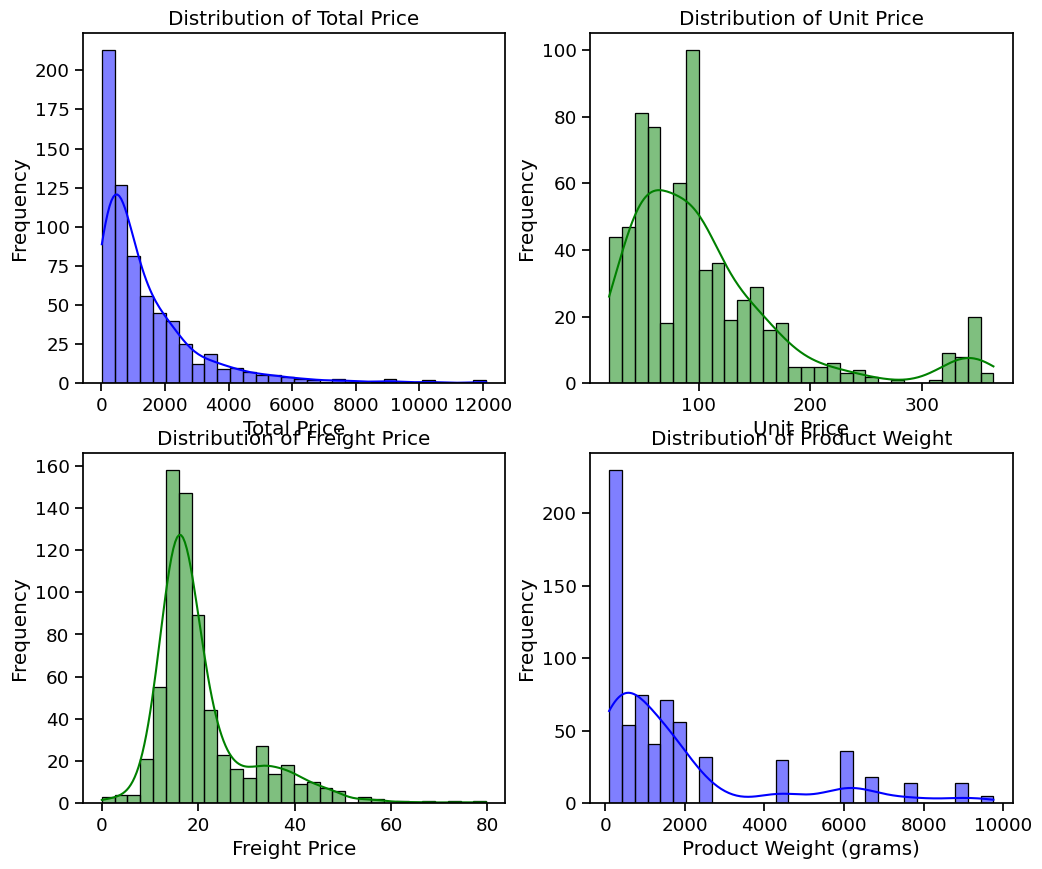

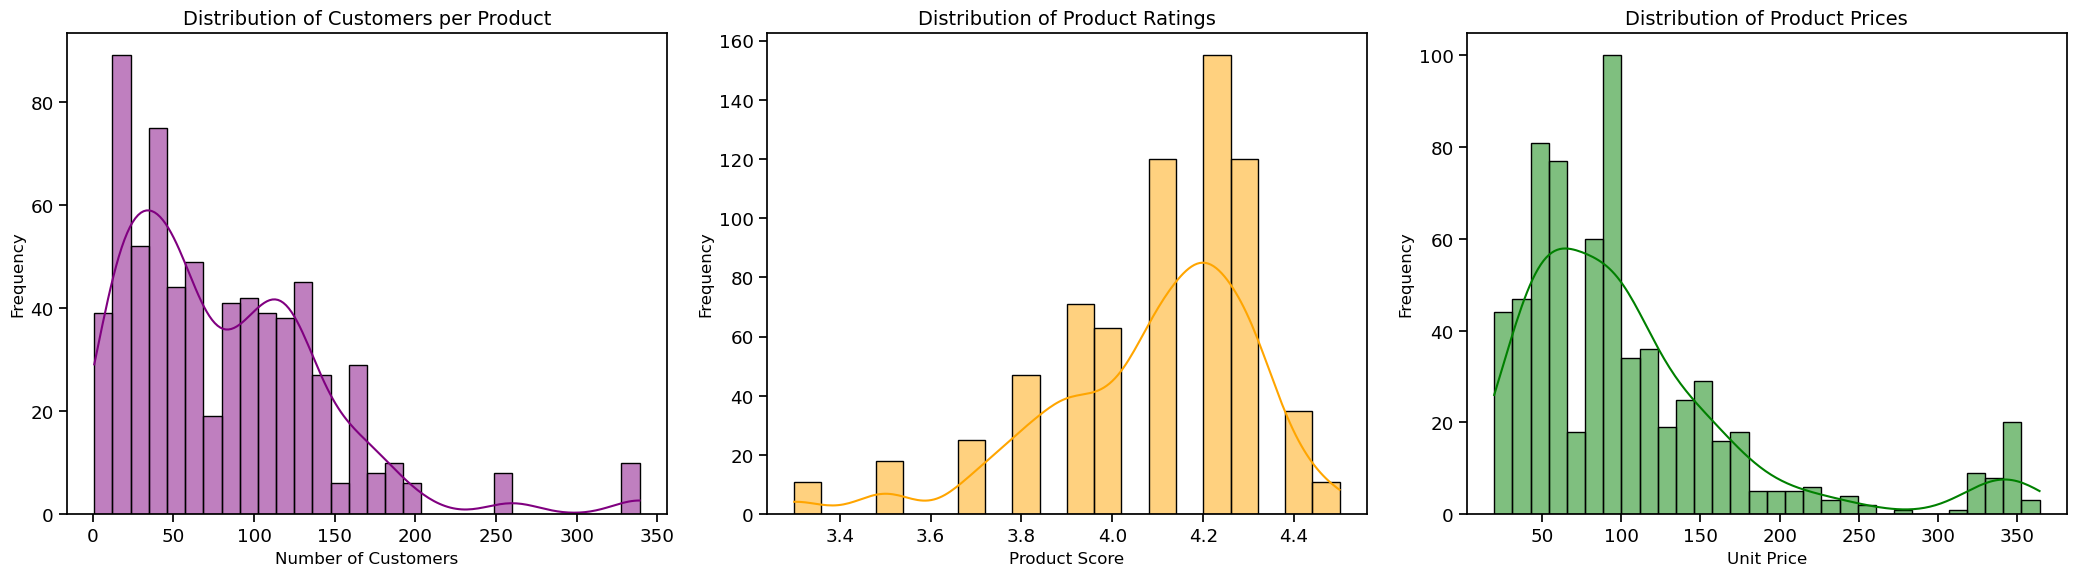

In [311]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of Total Price
sns.histplot(df["total_price"], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Total Price")
axes[0, 0].set_xlabel("Total Price")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].grid(False)

# Distribution of Unit Price
sns.histplot(df["unit_price"], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Unit Price")
axes[0, 1].set_xlabel("Unit Price")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].grid(False)

# Distribution of Freight Price
sns.histplot(df["freight_price"], bins=30, kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Freight Price")
axes[1, 0].set_xlabel("Freight Price")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].grid(False)

# Distribution of Product Weight
sns.histplot(df["product_weight_g"], bins=30, kde=True, color='blue', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Product Weight")
axes[1, 1].set_xlabel("Product Weight (grams)")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].grid(False)

# Create a 1-row, 3-column layout for subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# 1. Distribution of Customers per Product
sns.histplot(df["customers"], bins=30, kde=True, color="purple", ax=axes[0])
axes[0].set_title("Distribution of Customers per Product", fontsize=14)
axes[0].set_xlabel("Number of Customers", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].grid(False)

# 2. Distribution of Product Scores
sns.histplot(df["product_score"], bins=20, kde=True, color="orange", ax=axes[1])
axes[1].set_title("Distribution of Product Ratings", fontsize=14)
axes[1].set_xlabel("Product Score", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].grid(False)

# 2. Distribution of Product Prices
sns.histplot(df["unit_price"], bins=30, kde=True, color="green", ax=axes[2])
axes[2].set_title("Distribution of Product Prices", fontsize=14)
axes[2].set_xlabel("Unit Price", fontsize=12)
axes[2].set_ylabel("Frequency", fontsize=12)
axes[2].grid(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

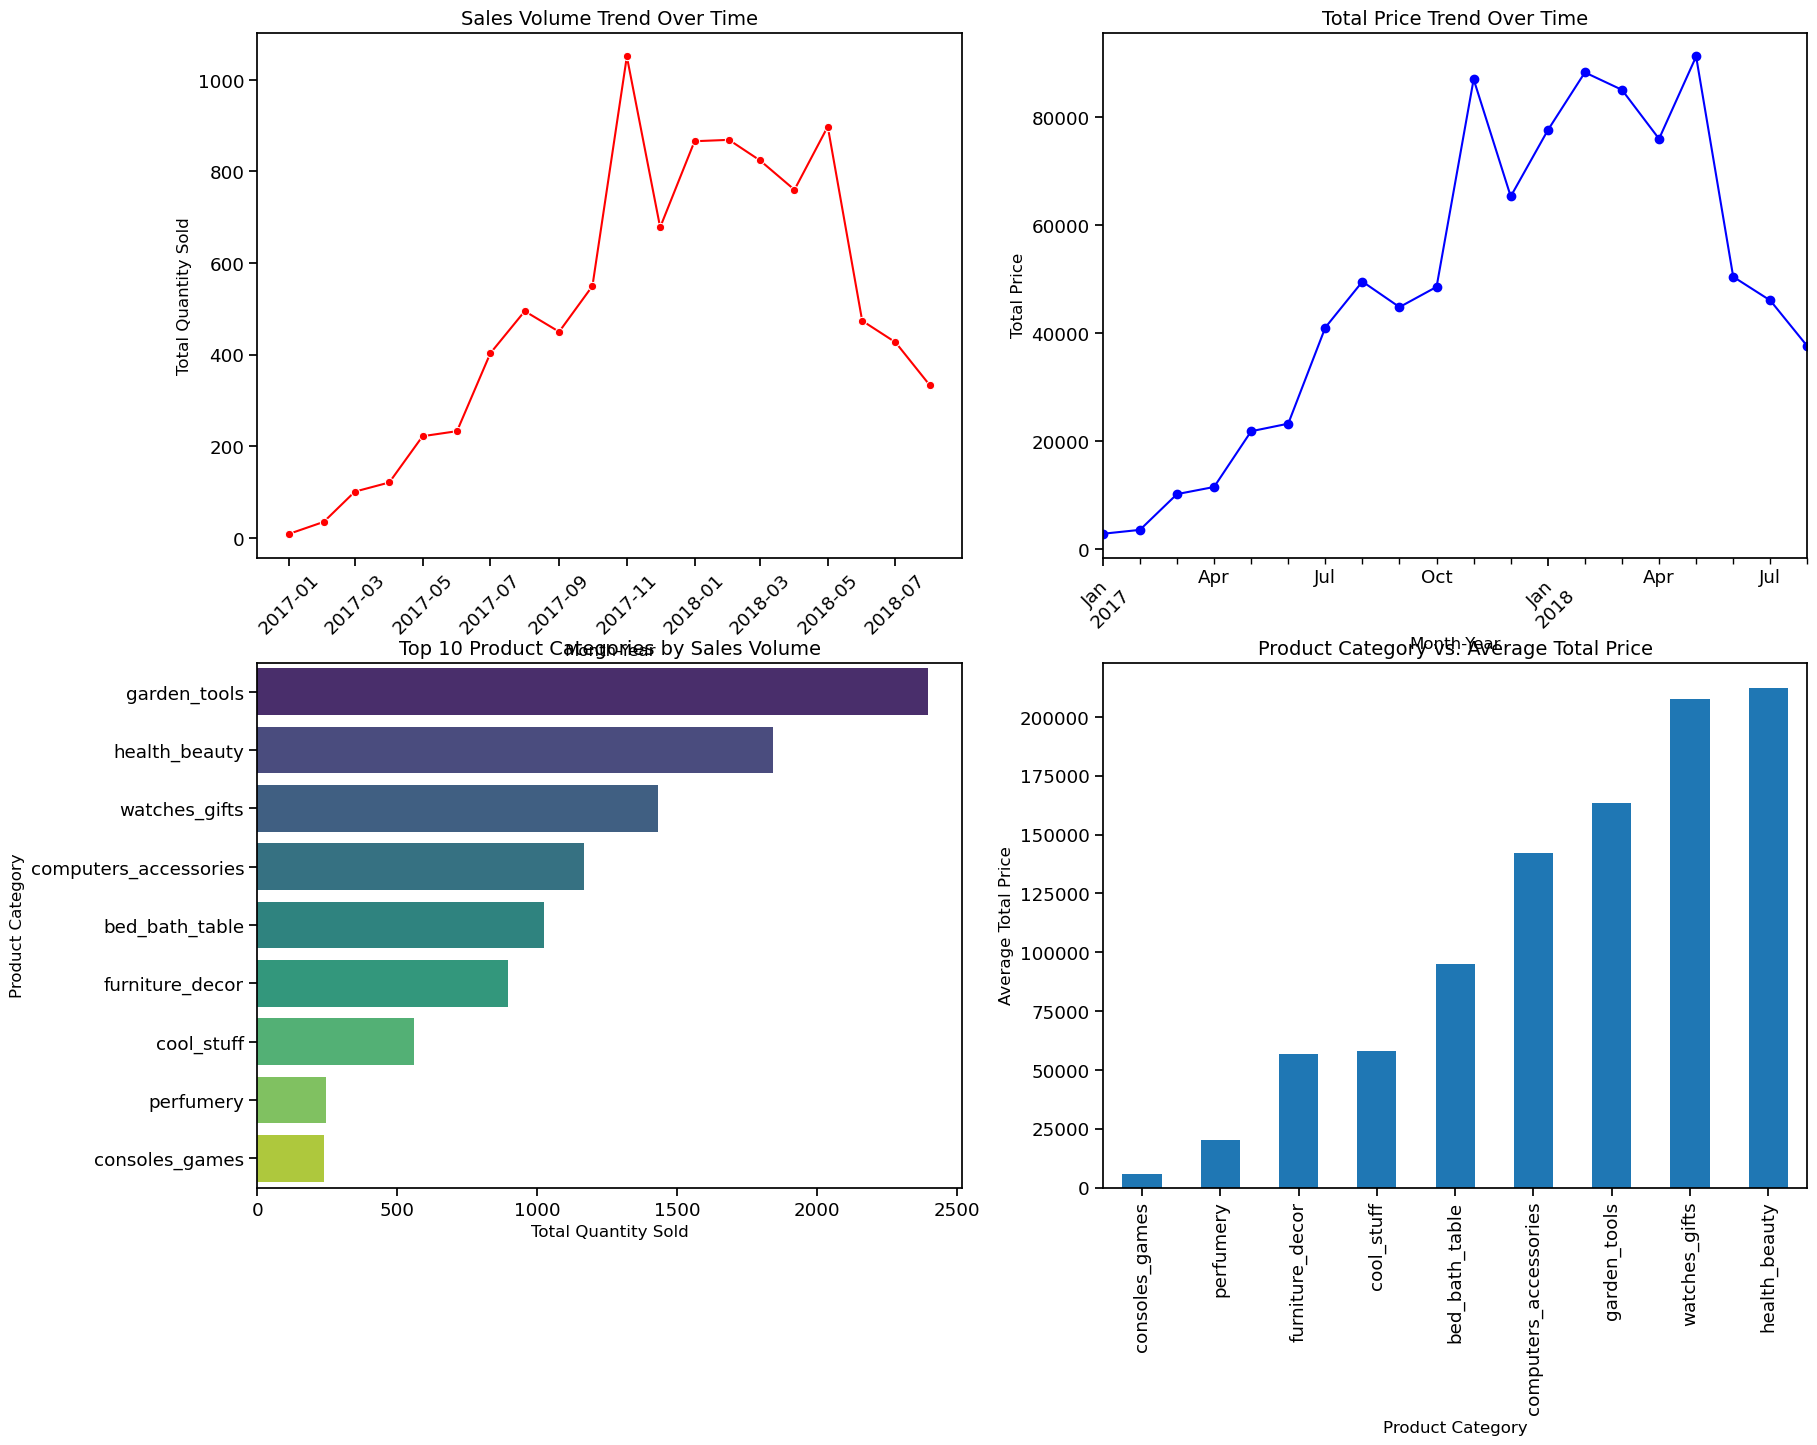

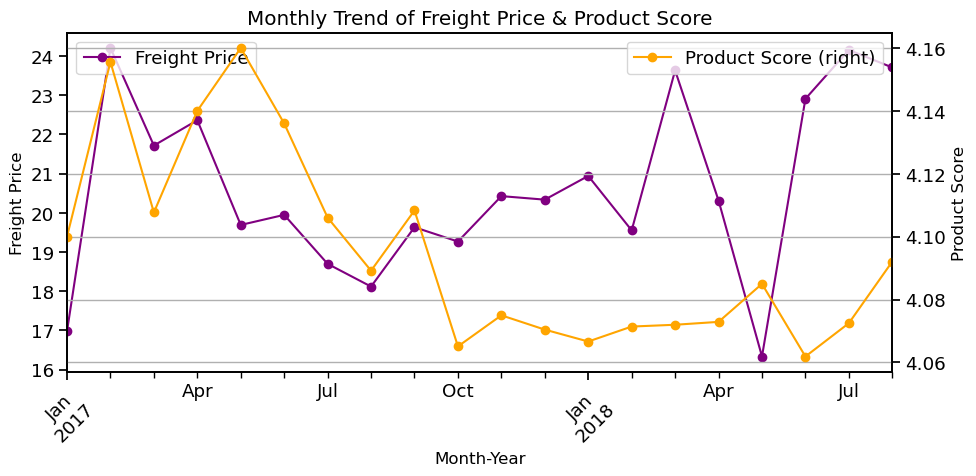

In [312]:
# Convert month_year to proper datetime format
df["month_year"] = pd.to_datetime(df["month_year"], format='%d-%m-%Y')

# Aggregate total sales volume per month
sales_trend = df.groupby("month_year")["qty"].sum().reset_index()

# Aggregate total quantity sold by product category
category_sales = df.groupby("product_category_name")["qty"].sum().reset_index()
category_sales = category_sales.sort_values(by="qty", ascending=False).head(10)

# Create a 1-row, 3-column grid of plots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Sales Trend Over Time
sns.lineplot(x="month_year", y="qty", data=sales_trend, marker="o", color="red", ax=axes[0, 0])
axes[0, 0].set_title("Sales Volume Trend Over Time", fontsize=14)
axes[0, 0].set_xlabel("Month-Year", fontsize=12)
axes[0, 0].set_ylabel("Total Quantity Sold", fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(False)

# Plot 2: Total Price Trend Over Time
df.groupby('month_year')['total_price'].sum().plot(marker="o", color="b", kind='line', ax=axes[0, 1])
axes[0, 1].set_title('Total Price Trend Over Time', fontsize=14)
axes[0, 1].set_xlabel('Month-Year', fontsize=12)
axes[0, 1].set_ylabel('Total Price', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(False)

# Plot 3: Top 10 Product Categories by Sales Volume
sns.barplot(x="qty", y="product_category_name", data=category_sales, palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title("Top 10 Product Categories by Sales Volume", fontsize=14)
axes[1, 0].set_xlabel("Total Quantity Sold", fontsize=12)
axes[1, 0].set_ylabel("Product Category", fontsize=12)
axes[1, 0].grid(False)

# 1. Bar plot of product_category_name vs. total_price
df.groupby('product_category_name')['total_price'].sum().sort_values().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Product Category vs. Average Total Price', fontsize=14)
axes[1, 1].set_xlabel('Product Category', fontsize=12)
axes[1, 1].set_ylabel('Average Total Price', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].grid(False)

# Time-Series Analysis: Monthly trends
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby("month_year")["freight_price"].mean().plot(marker="o", color="purple", ax=ax, label="Freight Price")
df.groupby("month_year")["product_score"].mean().plot(marker="o", color="orange", ax=ax, secondary_y=True, label="Product Score")
ax.set_title("Monthly Trend of Freight Price & Product Score")
ax.set_xlabel("Month-Year", fontsize=12)
ax.set_ylabel("Freight Price", fontsize=12)
ax.right_ax.set_ylabel("Product Score", fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc="upper left")
ax.right_ax.legend(loc="upper right")
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

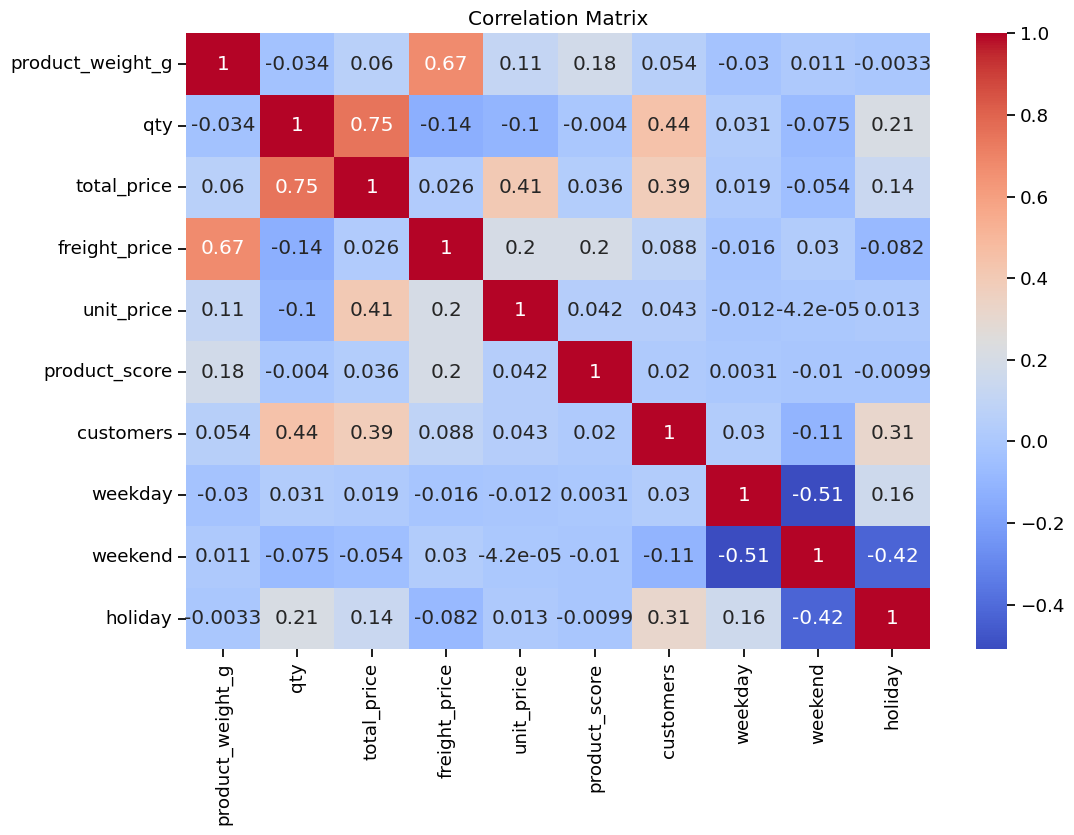

In [313]:
subset_cols = ['product_weight_g', 'qty', 'total_price', 'freight_price', 'unit_price', 'product_score', 'customers', 'weekday', 'weekend', 'holiday']
subset_df = df[subset_cols]

# Compute correlation matrix
corr_matrix = subset_df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

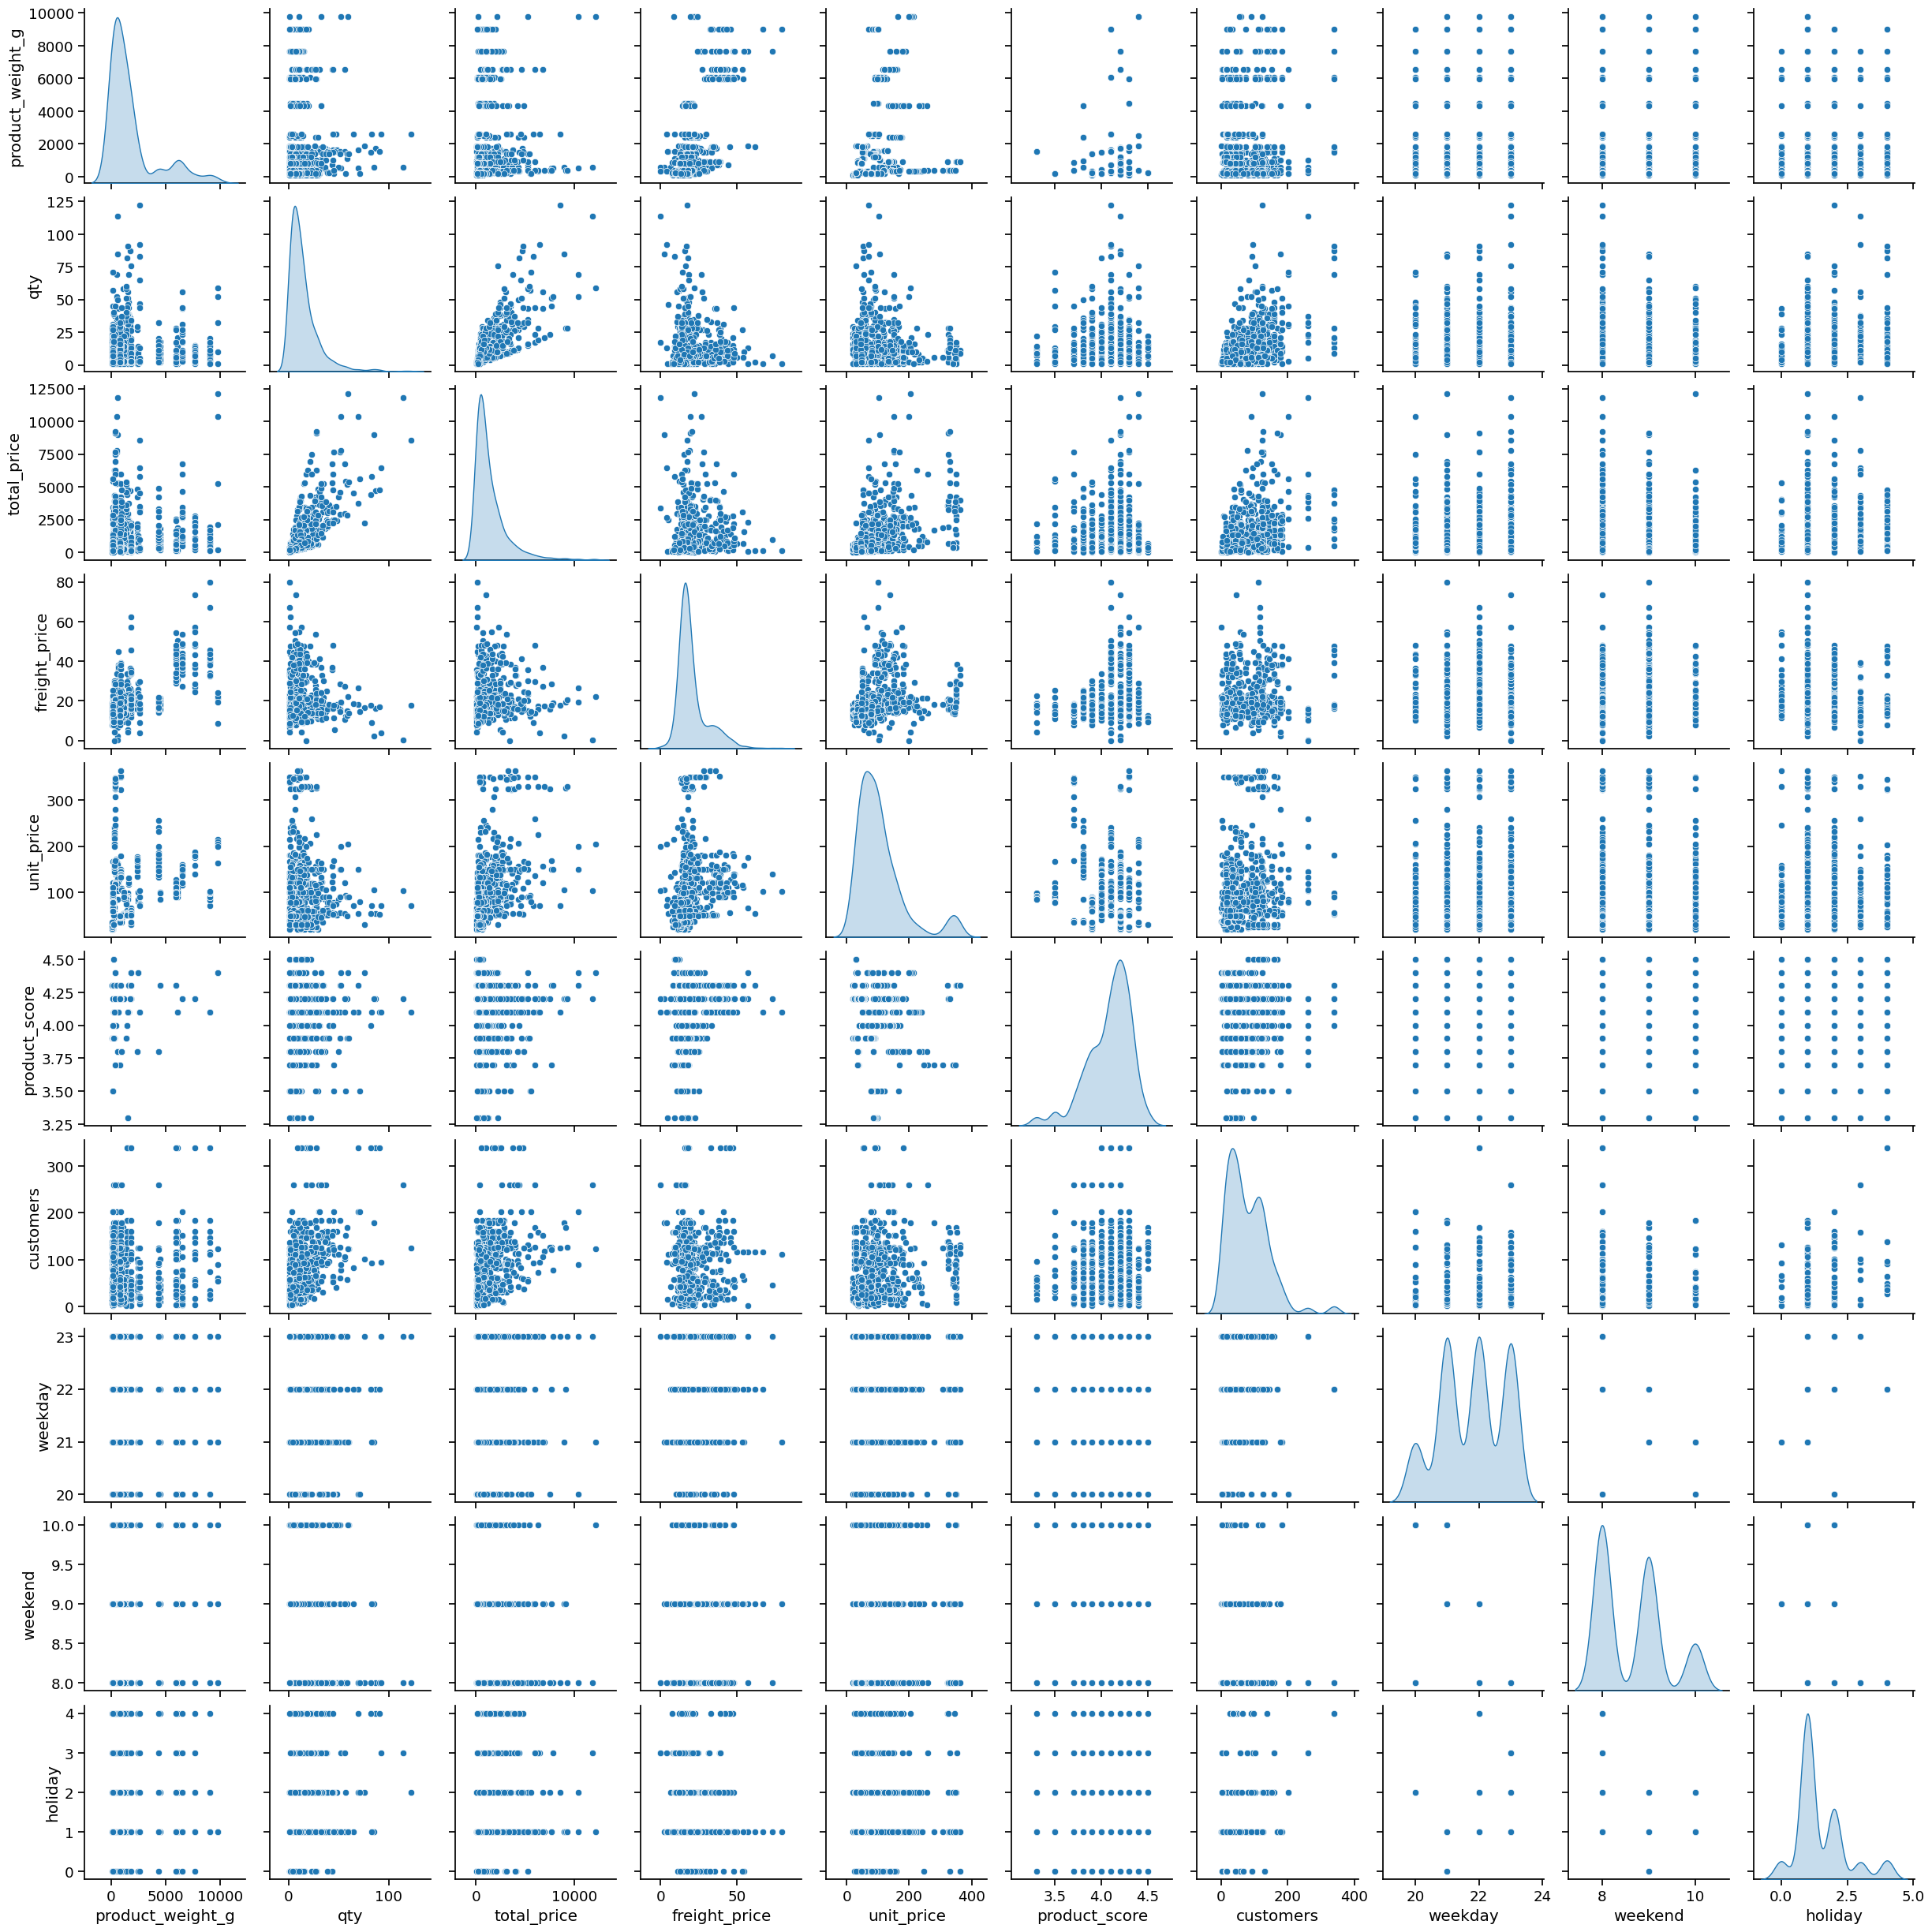

In [314]:
# Pairwise scatter plot
sns.set_context("notebook", font_scale=1.2)
sns.pairplot(subset_df, vars=['product_weight_g', 'qty', 'total_price', 'freight_price', 'unit_price', 'product_score', 'customers', 'weekday', 'weekend', 'holiday'], diag_kind='kde')
plt.show()

## Feature Engineering

### Calculate Revenue and Profit

In [315]:
df['revenue'] = df['qty'] * df['total_price']
df['profit'] = df['revenue'] - df['freight_price']

### Calculate Margin

In [316]:
df['margin'] = (df['profit'] / df['revenue']) * 100

### Price Ratios

In [317]:
df['price_ratio_1'] = df['unit_price'] / df['comp_1']
df['price_ratio_2'] = df['unit_price'] / df['comp_2']
df['price_ratio_3'] = df['unit_price'] / df['comp_3']

### Price Differences

In [346]:
df['price_diff_1'] = df['unit_price'] - df['comp_1']
df['price_diff_2'] = df['unit_price'] - df['comp_2']
df['price_diff_3'] = df['unit_price'] - df['comp_3']

### Market Demand Indicators

In [347]:
df['customer_score_ratio'] = df['customers'] / df['product_score']
df['customer_photo_ratio'] = df['customers'] / df['product_photos_qty']
df['description_length_ratio'] = df['product_description_lenght'] / df['product_name_lenght']

### Time-related Features

In [348]:
df['month_year'] = pd.to_datetime(df['month_year'])
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['is_holiday'] = df['holiday']

### Temporal features

In [349]:
df["quarter"] = df["month_year"].dt.quarter
df["day_of_week"] = df["month_year"].dt.dayofweek
df["weekend_ratio"] = df["weekend"] / (df["weekday"] + df["weekend"])

### Product attribute ratios

In [350]:
df["price_per_gram"] = df["unit_price"] / df["product_weight_g"]
df["desc_to_name_ratio"] = df["product_description_lenght"] / df["product_name_lenght"]
df["photo_score_ratio"] = df["product_photos_qty"] / df["product_score"]

In [351]:
df.shape
# df.columns
# df.head().T

(676, 50)

### Define the input features (X)

In [324]:
X = df.drop(columns=['product_id', 'product_category_name', 'month_year', 'total_price', 'unit_price', 'product_name_lenght', 
                     'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'weekday', 'weekend', 'holiday', 
                     'month', 'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 
                     'lag_price', 'revenue', 'profit', 'margin', 'price_ratio_1', 'price_ratio_2', 'price_ratio_3', 
                     'customer_score_ratio', 'customer_photo_ratio', 'description_length_ratio', 'is_weekend', 'is_holiday', 
                     'quarter', 'day_of_week', 'price_per_gram'])
# X.head()
X.shape

(676, 10)

### Define the target (y)

In [325]:
y = df["unit_price"]
# y.head()
y.shape

(676,)

### Split data into train and test sets (80% train, 20% test)

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
# X_train.head()
X_train.shape

(540, 10)

In [328]:
# y_train.head()
y_train.shape

(540,)

### Standardize the features (scaling)

In [329]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

### Fit multiple Regression Models (Random Forest, Ridge, Linear, Lasso, Gradient Boosting, XGBoost) on the training data

#### Random Forest

In [330]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Ridge

In [331]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

#### Linear Regression

In [332]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

#### Lasso

In [333]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

#### Gradient Boosting

In [334]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#### XGBoost

In [335]:
xgboost = XGBRegressor(n_estimators=100, random_state=42, objective="reg:squarederror")
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Performance Evaluation

### Predictions

In [353]:
rf_preds = rf.predict(X_test)
ridge_preds = ridge.predict(X_test_scaled)
linear_preds = linear_reg.predict(X_test_scaled)
lasso_preds = lasso.predict(X_test_scaled)
gb_preds = gradient_boosting.predict(X_test)
xgb_preds = xgboost.predict(X_test)

### All Model in Calculate R-squared(R²), Mean Absolute Error(MAE) & Root Mean Squared Error(RMSE)

In [337]:
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

ridge_r2 = r2_score(y_test, ridge_preds)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))

linear_r2 = r2_score(y_test, linear_preds)
linear_mae = mean_absolute_error(y_test, linear_preds)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_preds))

lasso_r2 = r2_score(y_test, lasso_preds)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))

gb_r2 = r2_score(y_test, gb_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))

xgb_r2 = r2_score(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

### Model Performance Comparison

#### Below is the performance comparison of different models based on **R² Score, MAE & RMSE**.

In [338]:
results = {
    "Model": [
        "Random Forest", "Ridge Regression", "Linear Regression", 
        "Lasso Regression", "Gradient Boosting", "XGBoost"
    ],
    "R² Score": [rf_r2, ridge_r2, linear_r2, lasso_r2, gb_r2, xgb_r2],
    "MAE": [rf_mae, ridge_mae, linear_mae, lasso_mae, gb_mae, xgb_mae],
    "RMSE": [rf_rmse, ridge_rmse, linear_rmse, lasso_rmse, gb_rmse, xgb_rmse]
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)

# Display table
results_df

Model  R² Score        MAE       RMSE
0      Random Forest  0.943401   8.348829  17.486178
1   Ridge Regression  0.711709  32.869019  39.464297
2  Linear Regression  0.711671  32.868522  39.466954
3   Lasso Regression  0.711834  32.899738  39.455739
4  Gradient Boosting  0.942994  10.899219  17.548818
5            XGBoost  0.930449   8.608535  19.383933

### Model Performance Visualization

#### The following bar charts compare the performance of different models based on **R² Score, MAE & RMSE**.  
#### The color gradient indicates relative performance, with **green** representing better scores and **red** indicating worse scores.

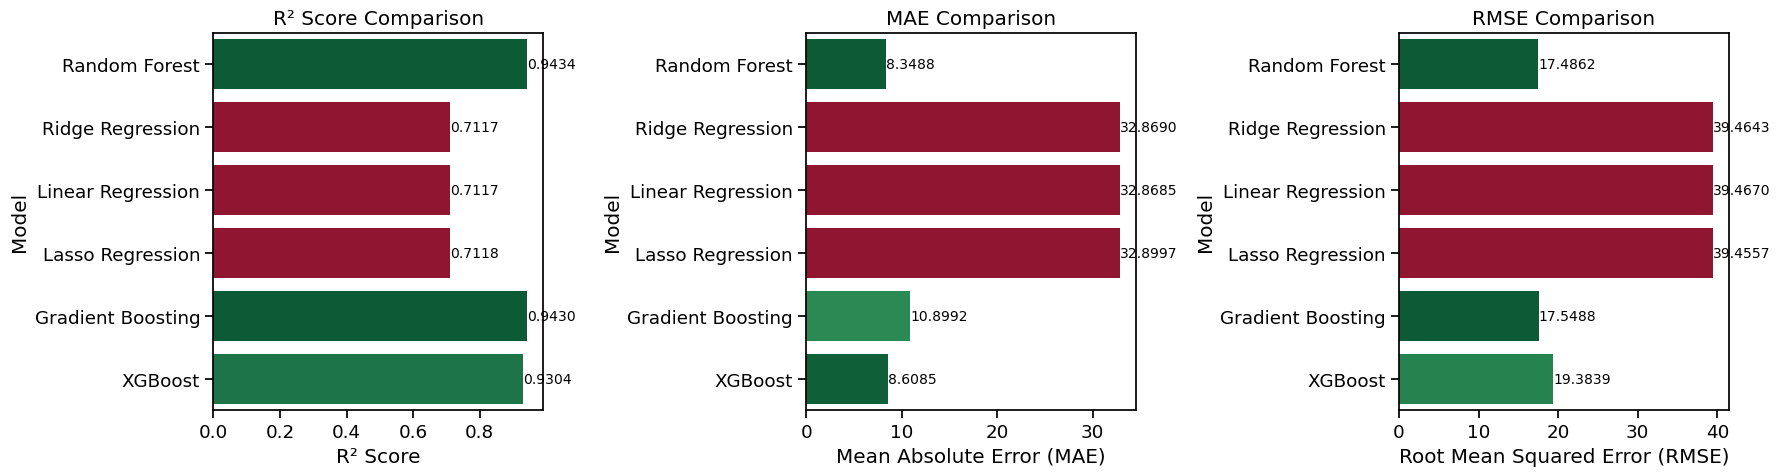

In [339]:
# Function to add value labels
def add_labels(ax, data):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.4f}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

# Normalize values for gradient coloring
r2_norm = (results_df["R² Score"] - np.min(results_df["R² Score"])) / (
            np.max(results_df["R² Score"]) - np.min(results_df["R² Score"])
        )
r2_colors = sns.color_palette("RdYlGn", as_cmap=True)(r2_norm)

mae_norm = 1 - (results_df["MAE"] - np.min(results_df["MAE"])) / (
                   np.max(results_df["MAE"]) - np.min(results_df["MAE"])
               )
mae_colors = sns.color_palette("RdYlGn", as_cmap=True)(mae_norm)

rmse_norm = 1 - (results_df["RMSE"] - np.min(results_df["RMSE"])) / (
                    np.max(results_df["RMSE"]) - np.min(results_df["RMSE"])
                )
rmse_colors = sns.color_palette("RdYlGn", as_cmap=True)(rmse_norm)

# Create subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score Chart
ax1 = sns.barplot(x=results_df["R² Score"], y=results_df["Model"], palette=r2_colors, ax=axes[0])
axes[0].set_xlabel("R² Score")
axes[0].set_title("R² Score Comparison")
add_labels(ax1, results_df["R² Score"])

# MAE Chart
ax2 = sns.barplot(x=results_df["MAE"], y=results_df["Model"], palette=mae_colors, ax=axes[1])
axes[1].set_xlabel("Mean Absolute Error (MAE)")
axes[1].set_title("MAE Comparison")
add_labels(ax2, results_df["MAE"])

# RMSE Chart
ax3 = sns.barplot(x=results_df["RMSE"], y=results_df["Model"], palette=rmse_colors, ax=axes[2])
axes[2].set_xlabel("Root Mean Squared Error (RMSE)")
axes[2].set_title("RMSE Comparison")
add_labels(ax3, results_df["RMSE"])

# Adjust layout
plt.tight_layout()
plt.show()

## Model Explainability

### SHAP (SHapley Additive exPlanations)

SHAP Summary Plot for Random Forest


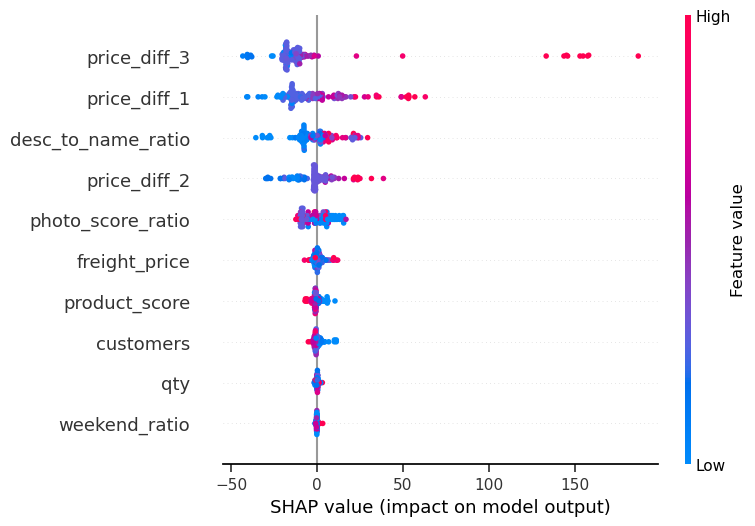

SHAP Summary Plot for Ridge Regression


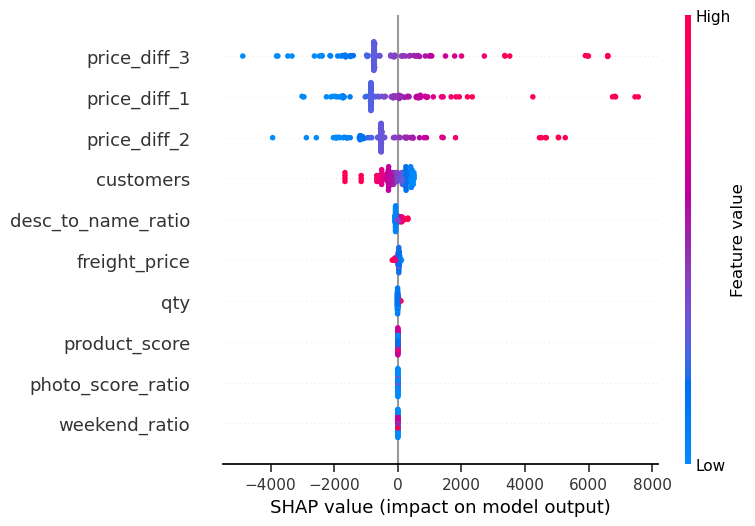

SHAP Summary Plot for Linear Regression


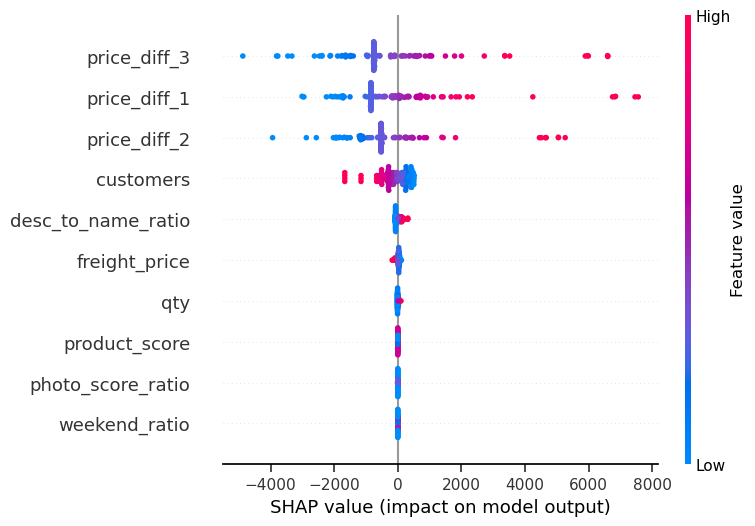

SHAP Summary Plot for Lasso Regression


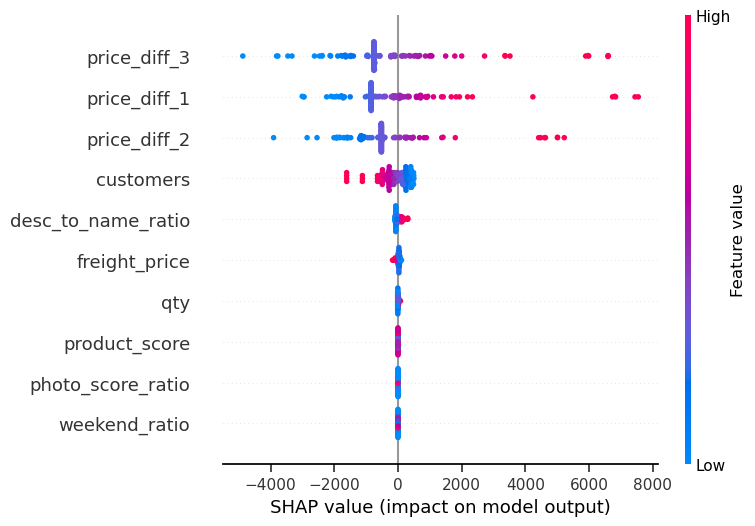

SHAP Summary Plot for Gradient Boosting


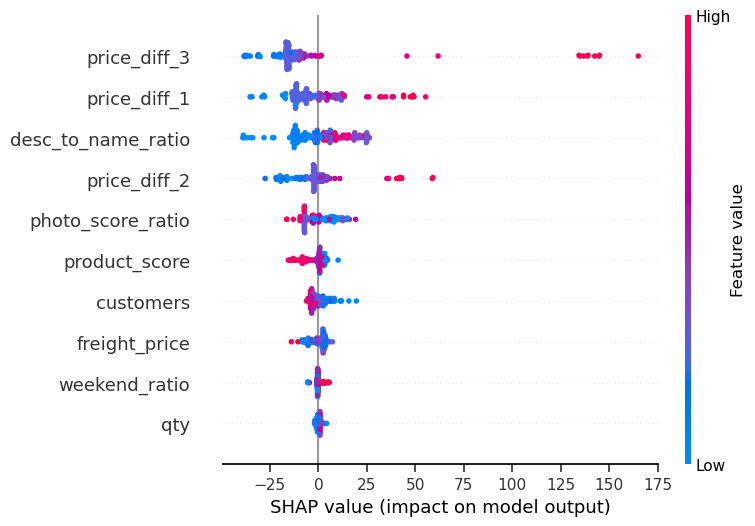

SHAP Summary Plot for XGBoost


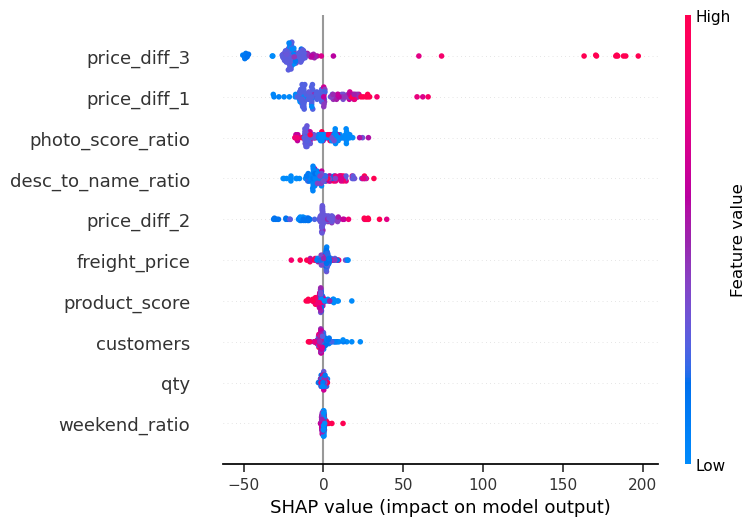

In [340]:
# Define the models dictionary correctly
models = {
    "Random Forest": rf,
    "Ridge Regression": ridge,
    "Linear Regression": linear_reg,
    "Lasso Regression": lasso,
    "Gradient Boosting": gradient_boosting,
    "XGBoost": xgboost
}

# SHAP explanations
for name, model in models.items():
    print(f"SHAP Summary Plot for {name}")

    if name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    else:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_test)

    shap.summary_plot(shap_values, X_test)
    plt.show()

### Permutation Importance

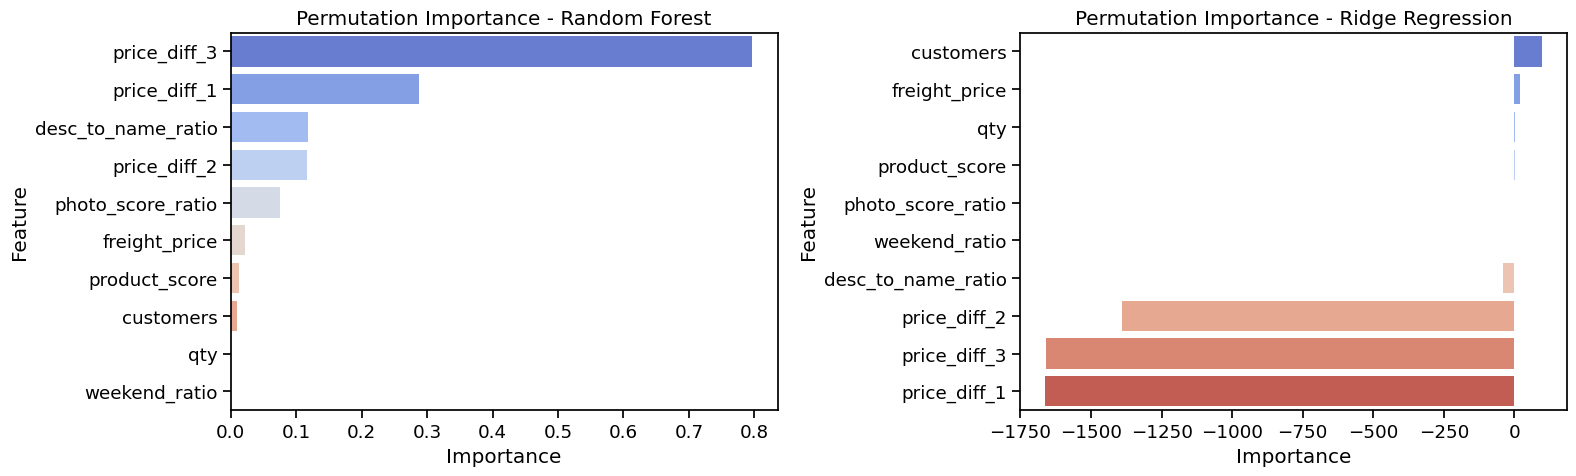

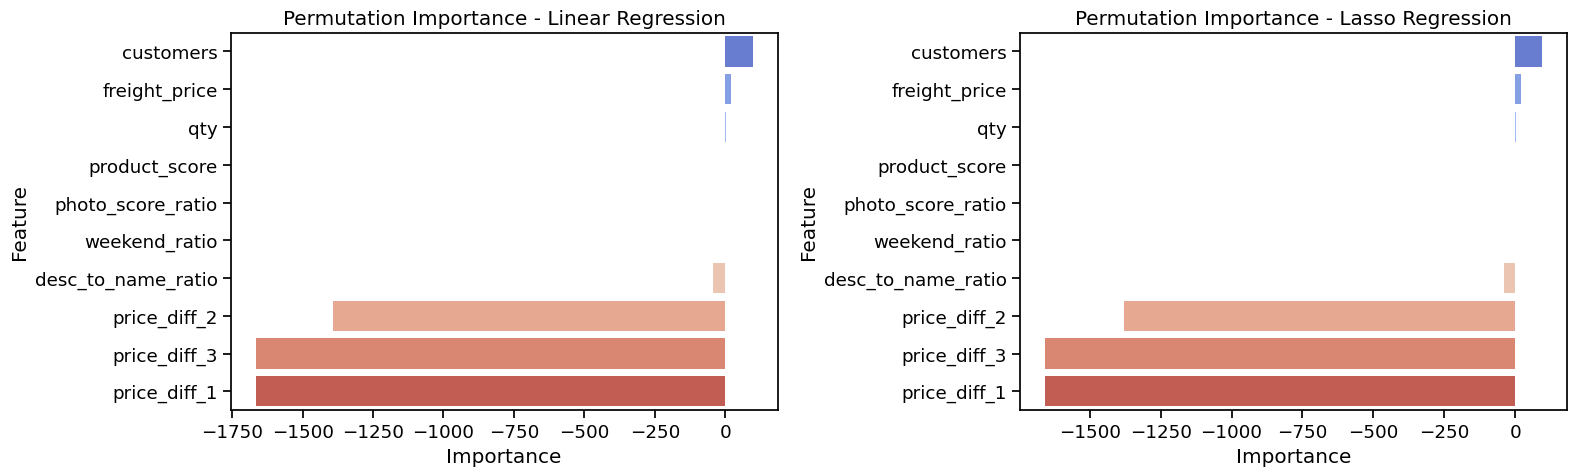

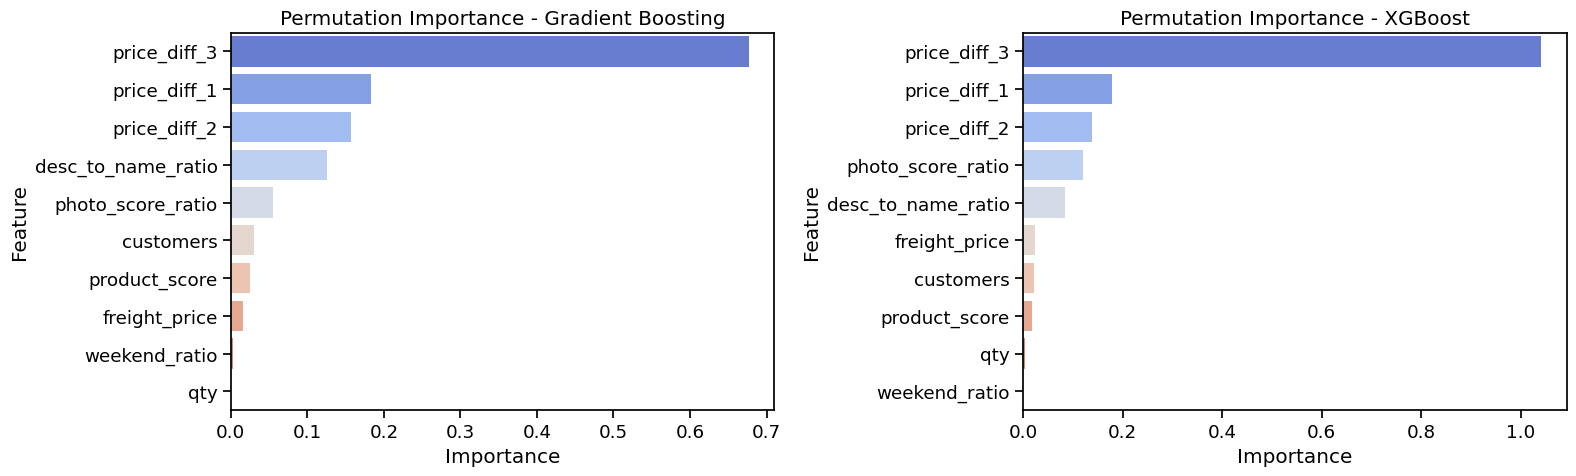

In [341]:
# Define model names list
model_names = list(models.keys())

# Ensure feature_sets is defined (assuming it contains feature subsets for each model)
feature_sets = {name: X_test for name in model_names}

# Loop through models in sets of 2
for i in range(0, len(model_names), 2):
    num_plots = min(2, len(model_names) - i)  # Handle last row with single plot
    fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 5))  

    # If only one chart in last row, make axes a single object
    if num_plots == 1:
        axes = [axes]

    for j in range(num_plots):
        name = model_names[i + j]
        model = models[name]
        X_test_selected = feature_sets[name]

        # Compute permutation importance
        perm_importance = permutation_importance(model, X_test_selected, y_test, n_repeats=10, random_state=42)

        # Convert to DataFrame
        importance_df = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": perm_importance.importances_mean
        }).sort_values(by="Importance", ascending=False)

        # Plot
        sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm", ax=axes[j])
        axes[j].set_title(f"Permutation Importance - {name}")
        axes[j].grid(False)  # Remove grid lines

    # Adjust layout
    plt.tight_layout()
    plt.show()

## Visualization

### Pricing Trends

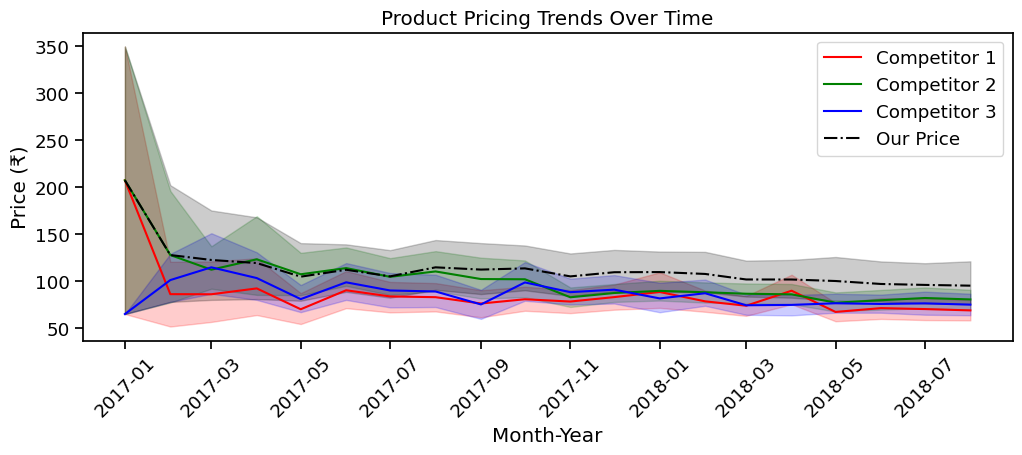

In [342]:
# Pricing Trends Over Time
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x="month_year", y="comp_1", label="Competitor 1", color="red")
sns.lineplot(data=df, x="month_year", y="comp_2", label="Competitor 2", color="green")
sns.lineplot(data=df, x="month_year", y="comp_3", label="Competitor 3", color="blue")
sns.lineplot(data=df, x="month_year", y="unit_price", label="Our Price", color="black", linestyle="dashdot")
plt.title("Product Pricing Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Price (₹)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Competitor Analysis

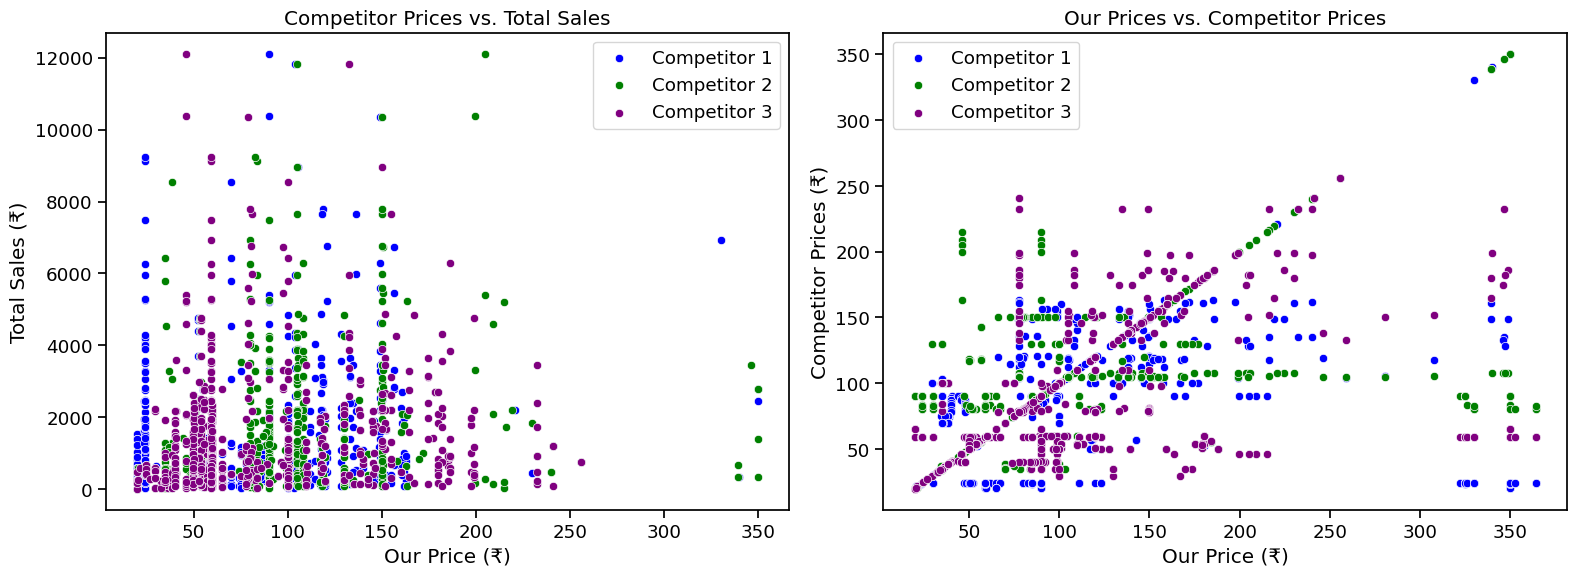

In [343]:
# Create a 1-row, 2-column subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Competitor Prices vs. Total Sales
sns.scatterplot(data=df, x="comp_1", y="total_price", label="Competitor 1", color="blue", ax=axes[0])
sns.scatterplot(data=df, x="comp_2", y="total_price", label="Competitor 2", color="green", ax=axes[0])
sns.scatterplot(data=df, x="comp_3", y="total_price", label="Competitor 3", color="purple", ax=axes[0])
axes[0].set_title("Competitor Prices vs. Total Sales")
axes[0].set_xlabel("Our Price (₹)")
axes[0].set_ylabel("Total Sales (₹)")
axes[0].legend()

# Our Prices vs. Competitor Prices
sns.scatterplot(data=df, x="unit_price", y="comp_1", label="Competitor 1", color="blue", ax=axes[1])
sns.scatterplot(data=df, x="unit_price", y="comp_2", label="Competitor 2", color="green", ax=axes[1])
sns.scatterplot(data=df, x="unit_price", y="comp_3", label="Competitor 3", color="purple", ax=axes[1])
axes[1].set_title("Our Prices vs. Competitor Prices")
axes[1].set_xlabel("Our Price (₹)")
axes[1].set_ylabel("Competitor Prices (₹)")
axes[1].legend()

# Adjust layout and show
plt.tight_layout()
plt.show()

### Model Predictions

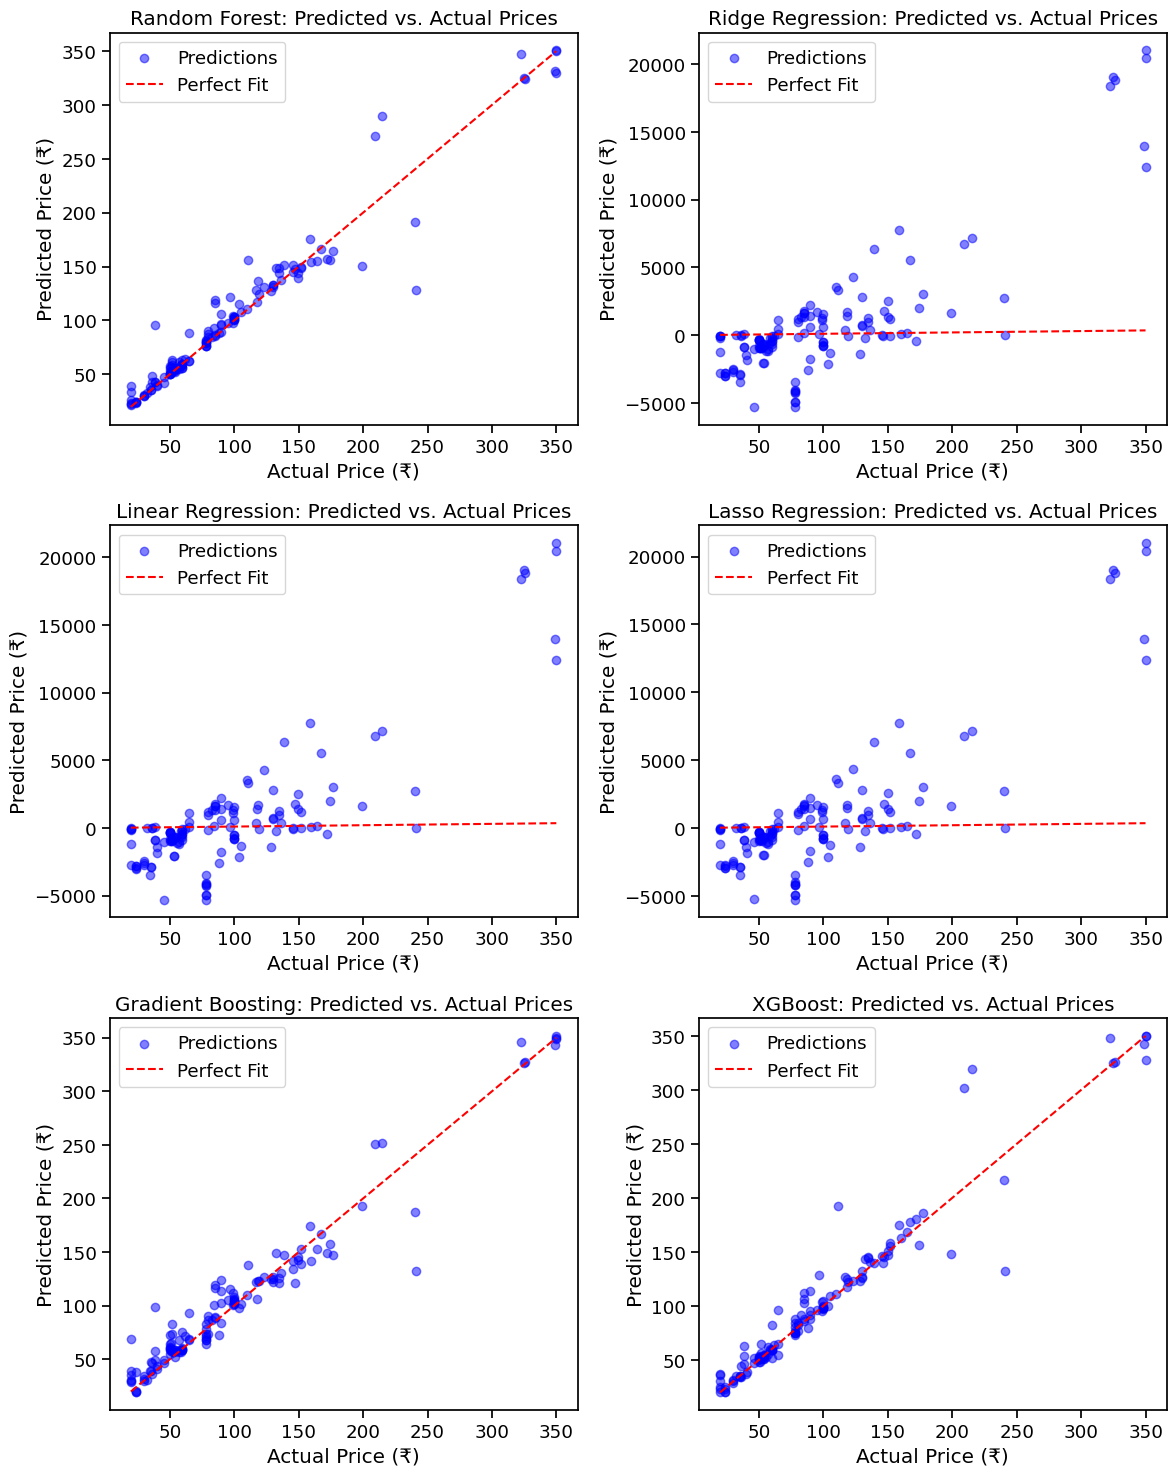

In [344]:
# Define models and make predictions
model_predictions = {name: model.predict(X_test) for name, model in models.items()}

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Plot each model in a separate subplot
for i, (model_name, predictions) in enumerate(model_predictions.items()):
    axes[i].scatter(y_test, predictions, alpha=0.5, color="blue", label="Predictions")
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")
    axes[i].set_title(f"{model_name}: Predicted vs. Actual Prices")
    axes[i].set_xlabel("Actual Price (₹)")
    axes[i].set_ylabel("Predicted Price (₹)")
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## All Models Deployment

In [345]:
joblib.dump(scaler, "Standard Scaler/scaler_model.pkl")

joblib.dump(rf, "Model/random_forest_model.pkl")
joblib.dump(ridge, "Model/ridge_model.pkl")
joblib.dump(linear_reg, "Model/linear_regression_model.pkl")
joblib.dump(lasso, "Model/lasso_model.pkl")
joblib.dump(gradient_boosting, "Model/gradient_boosting_model.pkl")
joblib.dump(xgboost, "Model/xgboost_model.pkl")

print("Model trained and saved successfully.")

Model trained and saved successfully.
